# **Predictive Modeling - Logistic Regression**
- ## Predictive modeling is a commonly used statistical technique to predict future behavior.
<br><br>

- # **Look at the past and predict the future**
- ### **Applications**: Classification problems (e.g., spam detection, disease prediction).

<br>

---

<br><br>
# **Classification VS Regression**
<br><br><br><br><br><br>

---

<br><br>
# **Linear Regression VS Logistic Regression**
<br><br><br><br><br><br>

---

## **Linear Regression**
- Used for **regression** tasks (predicting continuous values).
- Model: 
$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n + \epsilon \
$$
- Output: Unbounded continuous value.



## **Logistic Regression**
- Used for **classification** tasks (predicting probabilities).<br><br>
- A Generalized Linear Model
$$
p = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n)}} 
$$
<br>
- Output: Probability (bounded between 0 and 1).
<br><br>

---

# Why not use Linear Regression instead of Logistic Regression **?**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression

def generate_dataset():
  dataset = make_classification(n_samples=20, n_features=1, n_repeated=0, n_redundant=0,  shift=30, 
                                scale=10, n_classes=2, n_clusters_per_class=1, n_informative=1, 
                                class_sep=1, random_state=1)
  df = pd.DataFrame(dataset[0])
  df = pd.concat([(np.ceil(df)).astype(int), pd.DataFrame(dataset[1])], axis=1)
  df.columns = ['GRE_Score', 'Admission']
  return df

dataset = generate_dataset()

map_color = np.array(['r', 'b'])

x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
dataset.head()

,GRE_Score,Admission
0,310,1
1,297,0
2,318,1
3,290,0
4,288,0


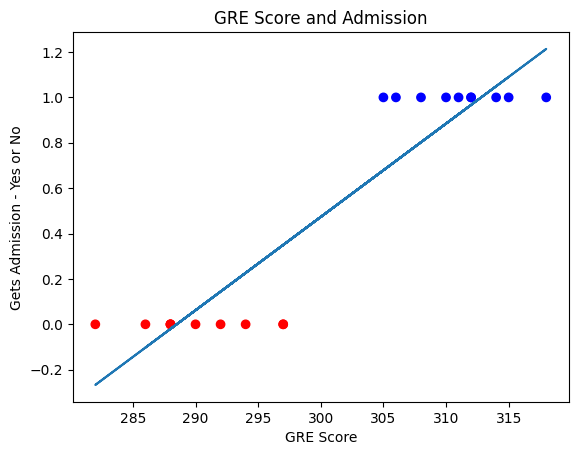

In [6]:
linearRegressor = LinearRegression()
linearRegressor.fit(x, y)

plt.scatter(x, y, c=map_color[y])
plt.plot(x, linearRegressor.predict(x))
plt.title('GRE Score and Admission')
plt.xlabel('GRE Score')
plt.ylabel('Gets Admission - Yes or No')

plt.show()

# **3. Key Concepts in Logistic Regression**<br>

## **Sigmoid Function**<br>
- Maps any real-valued number into a value between 0 and 1.
- Formula: 
  $$
  \sigma(z) = \frac{1}{1 + e^{-z}}
  $$
  where 
  $$
  z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n.
  $$

---

## **Decision Boundary**<br>
- Threshold (e.g., 0.5) to classify probabilities into classes (0 or 1).<br><br>

---

## **Cost Function**<br>
- **Log Loss** (Binary Cross-Entropy):
$$
J(\beta) = -\frac{1}{m} \sum_{i=1}^m \left[ y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right]
$$
- #### $m$: Number of training examples.
- #### $y_i$: Actual label.
- #### $p_i$: Predicted probability.<br><br>

---

## **Gradient Descent**<br><br>

- Update rule for coefficients:
  $$
  \beta_j := \beta_j - \alpha \frac{\partial J(\beta)}{\partial \beta_j}
  $$
- ### $\alpha$: Learning rate.<br><br>
- ### $\frac{\partial J(\beta)}{\partial \beta_j}$: Partial derivative of the cost function.

---


# Import necessary libraries

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Generate a binary classification dataset

In [9]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Split into training and testing sets

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Visualizing the Data

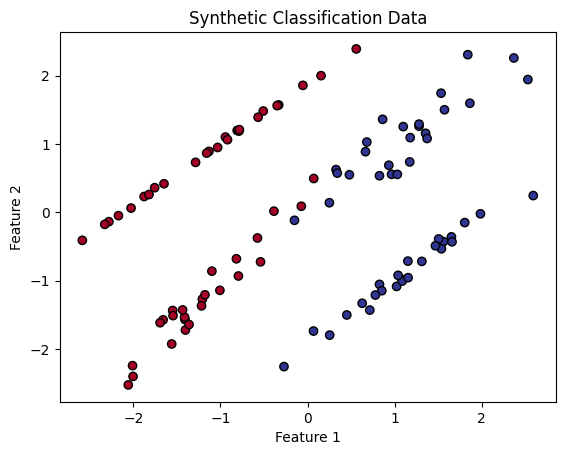

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Synthetic Classification Data")
plt.show()

# Initialize and train the model

In [44]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# Predict on test data

In [46]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0])

# Evaluation Metrics

Accuracy: 0.97


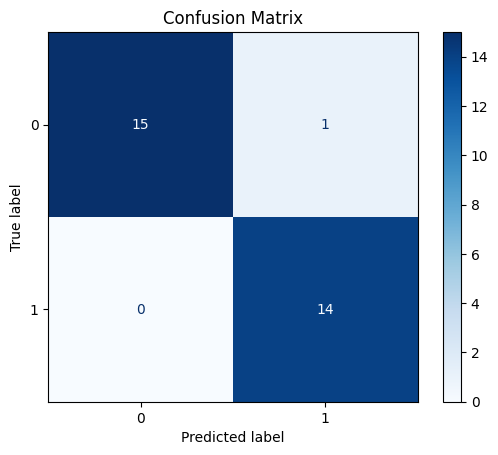

In [47]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Visualizing decision boundary

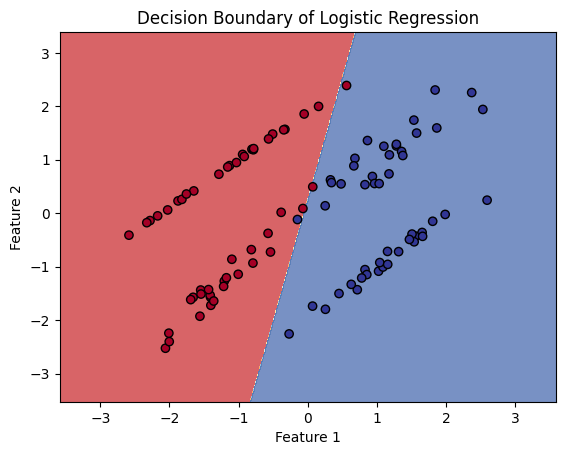

In [48]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict on meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.7, cmap=plt.cm.RdYlBu)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdYlBu)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary of Logistic Regression")
plt.show()